<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Привет еще раз. Спасибо, что доделал работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Привет! Спасибо, что прислал задание:) Поздравляю с приближением к концу первого модуля. Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделал большую работу над проектом, однако его еще можно улучшить. Будет здорово, если ты будешь отвечать на комментарии и участвовать в диалоге. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно. Рекомендации укажу таким же цветом; <font color=orange>оранжевый</font> - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 
</div>

Привет, заранее благодарю за ревью! Ко мне можно на "ты")
## Анализ для магазина "Стримчик"

### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (возрастная категория).

<a name="plan"></a>
## План:  
#### 1. [Изучение общей информации. Импорт библиотек, определение проблем.](#s1)  
#### 2. [Подготовка данных.](#s2)  
#### 3. [Исследовательский анализ данных.](#s3)  
*  [Выпуск игр по годам и их продажи.](#s3)  
*  [Изменение популярности жанров с течением времени.](#s3_2)  
*  ["Рождение" и "смерть" платформы.](#s3_3)  
*  [Продажи и релизы разных платформ по годам релиза. ТОП 2008-2016.](#s3_4)  
*  [Продажи игр по платформе.](#s3_5)  
*  [Зависимость отзывов и продаж.](#s3_6)  
*  [Успешность игр в зависимости от жанров.](#s3_7)

#### 4. [Портрет пользователя каждого региона.](#s4)    
*  [Самые популярные платформы.](#s4)    
*  [Самые популярные жанры.](#s4_2)    
*  [Рейтинг ESRB и продажи в регионах.](#s4_3)    

#### 5. [Проверка гипотез.](#s5)  
#### 6. [Общий вывод.](#s6)  

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Здорово, что каждому пункту вводной информации ты уделил внимание. 

</div>

<a name="s1"></a>
### Шаг 1. Изучение общей информации. Импорт библиотек, определение проблем.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display
import seaborn as sns
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
pd.set_option('mode.chained_assignment', None) #отключим предупреждения после проверки что всё работает как надо

<div class="alert alert-success">
<h2> Комментарий ревьюера</h2>

Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение. 

</div>

In [2]:
data=pd.read_csv('/datasets/games.csv')

In [3]:
data.info()
display(data)
display(data[data['Name'].isna()])
print(data['Rating'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64


count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64


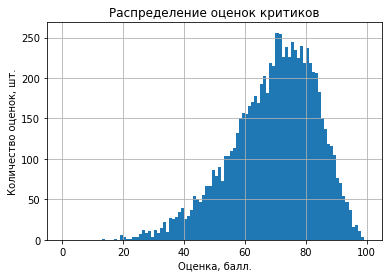

In [4]:
data.hist(column='Critic_Score', bins=100, range=(0, 100))
plt.title("Распределение оценок критиков")
plt.ylabel("Количество оценок, шт.")
plt.xlabel("Оценка, балл.");
print(data['Critic_Score'].describe())

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sales, dtype: float64


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
85,The Sims 3,PC,2009.0,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T
138,World of Warcraft,PC,2004.0,Role-Playing,0.08,6.21,0.00,0.00,93.0,7.3,T
192,Diablo III,PC,2012.0,Role-Playing,2.44,2.16,0.00,0.54,88.0,4,M
195,Microsoft Flight Simulator,PC,1996.0,Simulation,3.22,1.69,0.00,0.20,NaN,NaN,NaN
218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,2.57,1.68,0.00,0.58,93.0,8.2,T
273,Warcraft II: Tides of Darkness,PC,1995.0,Strategy,1.70,2.27,0.00,0.23,NaN,NaN,NaN
284,Half-Life,PC,1997.0,Shooter,4.03,0.00,0.09,0.00,96.0,9.1,M
288,World of Warcraft: The Burning Crusade,PC,2007.0,Role-Playing,2.57,1.52,0.00,0.00,91.0,7.9,T
313,The Elder Scrolls V: Skyrim,PC,2011.0,Role-Playing,1.16,2.12,0.00,0.60,94.0,8.1,M
330,The Sims: Unleashed,PC,2002.0,Simulation,2.03,1.56,0.00,0.17,79.0,8,T


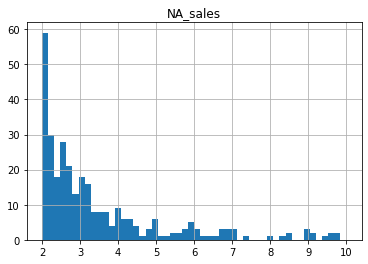

In [5]:
data.hist(column='NA_sales', bins=50, range=(2, 10))
print(data['NA_sales'].describe())
display(data.query('Platform=="PC"').head(10))

#### Выводы по данным:
* Названия столбцов необходимо привести к нижнему регистру.
* В 'Name' и 'Genre' 2 пропуска - можно без проблем удалить. Откуда подтянулись NaN не понятно.
* В 'Platform' 31 значение. 11 "хвостовых" (менее 100 строк каждая) дают суммарно 308 строк (менее 2%) - удалить?
* Некоторые игры переиздавались (Need for Speed: Most Wanted 2005 года была переиздана для PC и X360 а также новых платформ в 2012-13 г.) - необходимо подумать как это может повлиять на результаты (нужно ли с этим что-то делать).
* Годы выпуска: до 1994 менее 100 релизов в год, до 2002 менее 500 релизов в год.
* Genre: всё хорошо, 12 жанров.
* Sales: лидер продаж (Wii Sports) везде за исключением Японии и Южной Кореи входил в стартовый комплект к приставке. Вероятно есть и другие аналогичные продукты. Необходима дополнительная информация.
* В 'Year_of_Release' и 'Critic_Score' тип float можно заменить на int.
* Пропуски в годе выпуска могут обозначать что игра еще не вышла (НЕТ). Можно заполнить медианой года по другим платформам.
* Critic_Score: шкала от 0 до 100, почти у половины есть оценка. Средняя - 69, медиана 71. Распределение близко к нормальному.
* User_Score: шкала от 0.0 до 10.0 Необходимо избавиться от статуса 'tbd' и привести к float. 
* Rating:   

Обозначение | Кол-во | Описание | Возраст | Комментарий
--- |--- | --- | --- | ---
E   | 3990 | («Everyone») — «Для всех» | от 6
T   | 2961 | («Teen») — «Подросткам» | от 13
M   | 1563 | («Mature») — «Для взрослых» | от 17
E10+| 1420 | («Everyone 10 and older») — «Для всех от 10 лет и старше» | от 10
EC  |    8 | («Early childhood») — «Для детей младшего возраста» | от 3 | можно заменить E
K-A |    3 | | от 6 | соответствует E
RP  |    3 | («Rating Pending») — «Рейтинг ожидается» | --- | (2 стратегии и гонки) можно заменить E
AO  |    1 | («Adults Only 18+») — «Только для взрослых» | от 18 | можно заменить M

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицу выполнен.

</div>

[вернуться к оглавлению](#plan) 
<a name="s2"></a>
### Шаг 2. Подготовка данных.

In [6]:
data.columns = data.columns.str.lower() #приводим названия столбцов к нижнему регистру
data.dropna(subset=['name', 'genre'], inplace=True) #удаляем 2 строки без названия и жанра

<div class="alert alert-block alert-info">
Далее следует code reuse из проекта 1, поэтому присутствуют лишние переменные, которые можно было напрямую прописать в функцию и строку с apply.

In [7]:
#блок где возможно заполняет пропуски в 'year_of_release' медианой года выхода на других платформах
nan_colomn = 'year_of_release'   #переменная задает столбец с пропуском
group_colomn = 'name'            #переменная задает столбец по которому будем группировать для поиска медианы
median_series = data.groupby(group_colomn)[nan_colomn].median() #series со значениями медиан по группе

def median_groupby(row):       
    '''функция для заполнения пропусков в столбце медианами по группе 
    получает строку, выдергивает значение столбца группировки (group_colomn) 
    возвращает значение соответствующей ему медианы
    
    До использования необходимо определить:
    nan_colomn - переменная задает столбец с пропуском
    group_colomn - переменная задает столбец с признаком по которому будем группировать для поиска медианы
    median_series - series со значениями медиан по группе
    '''
    try:
        row_group_value = row[group_colomn]
        group_median = median_series[row_group_value]
        return group_median
    except:
        return 'error group_median'

#Заполняем 'year_of_release' медианой года выхода на других платформах
data[nan_colomn] = data[nan_colomn].fillna(data.apply(median_groupby, axis=1))

Из 269 пропусков осталось 146 - их корректно заполнить не чем - оставлю NaN.

In [8]:
#тест для сравнения memory usage float, int и Int
#data.memory_usage()
#data['critic_score'] = data['critic_score'].fillna(0).astype('int16')
#data['year_of_release'] = data['year_of_release'].fillna(0).astype('int16')
#data.memory_usage()

In [9]:
# Приведем 'critic_score' и 'year_of_release' к целочисленным значениям в целях экономии.
# Для приведения к целочисленным типам используем 'Int' (Nullable integer) 
# т.к. 'int' "не умеет работать" с NaN и в series c пропусками оставит 'float'.
#Для игнорирования NaN пропишем errors='ignore'.
data['critic_score'] = data['critic_score'].astype('Int8', errors='ignore')
# В случае с годом медиана дала несколько дробных значений (2002.5, 2001.5 и т.д.) 
# astype('Int64') "боится" их обрабатывать - поэтому предварительно округлим значения.
data['year_of_release'] = data['year_of_release'].round().astype('Int16', errors='ignore')
data.info()
data.memory_usage()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16567 non-null Int16
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null Int8
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int16(1), Int8(1), float64(4), object(5)
memory usage: 1.4+ MB


Index              133704
name               133704
platform           133704
year_of_release     50139
genre              133704
na_sales           133704
eu_sales           133704
jp_sales           133704
other_sales        133704
critic_score        33426
user_score         133704
rating             133704
dtype: int64

На основании memory_usage() можно сделать вывод что столбцы dtype: object, float64, int64 используют одинаковое количество памяти, а Int64 даже немного больше. Для экономии ресурсов необходимо сокращать разрядность числовых типов.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Верное решение. Здорово, что ты оптимизируешь структуру хранения данных. 
</div>

#оставлю себе ссылочку... https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#support-for-integer-na%23support-for-integer-na


In [10]:
# Для удобства укажем возраст в дополнение к букве рейтинга.
data['rating'] = data['rating'].where(data['rating']!='E', '06+ (E)')
data['rating'] = data['rating'].where(data['rating']!='T', '13+ (T)')
data['rating'] = data['rating'].where(data['rating']!='M', '17+ (M)')
data['rating'] = data['rating'].where(data['rating']!='E10+', '10+ (E10+)')

# Заменим редкие значения rating на близкие/совпадающие.
data['rating'] = data['rating'].where(data['rating']!='EC', '06+ (E)')
data['rating'] = data['rating'].where(data['rating']!='K-A', '06+ (E)')
data['rating'] = data['rating'].where(data['rating']!='RP', '06+ (E)')
data['rating'] = data['rating'].where(data['rating']!='AO', '17+ (M)')


Статус 'tbd' в пользовательских оценках вероятно обозначает To Be Determined (будет определено) - логично заменить на NaN.

count    7590.000000
mean        7.125000
std         1.500000
min         0.000000
25%         6.398438
50%         7.500000
75%         8.203125
max         9.703125
Name: user_score, dtype: float64


Index              133704
name               133704
platform           133704
year_of_release     50139
genre              133704
na_sales           133704
eu_sales           133704
jp_sales           133704
other_sales        133704
critic_score        33426
user_score          33426
rating             133704
dtype: int64

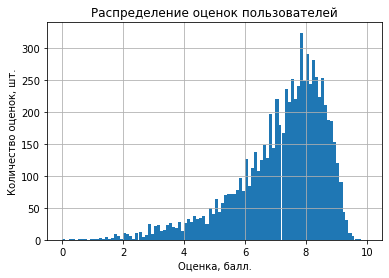

In [11]:
data['user_score'] = data['user_score'].where(data['user_score']!='tbd', np.NaN).astype('float16')
data.hist(column='user_score', bins=100, range=(0, 10))
plt.title("Распределение оценок пользователей")
plt.ylabel("Количество оценок, шт.")
plt.xlabel("Оценка, балл.");
print(data['user_score'].describe())
data.memory_usage()

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Верно, по своей сути tbd и является Nan. Отлично, что определяешь неявные пропущенные значения.

</div>

In [12]:
data['all_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales'] # Добавляем суммарные продажи

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Да, восстановить пропущенные значения мы не можем. Данных для этого недостаточно. Лучше работать с меньшим количеством данных хорошего качества.
    
Ошибки в данных устранены. Данные подготовлены к дальнейшему анализу. 

</div>

[вернуться к оглавлению](#plan) 
<a name="s3"></a>
### Шаг 3. Исследовательский анализ данных.
#### Выпуск игр по годам и их продажи.

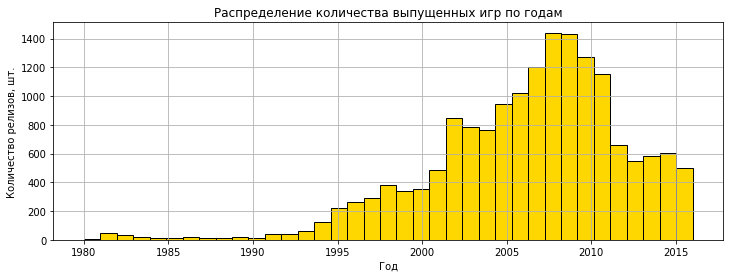

In [13]:
data.hist(column='year_of_release', bins=37, color='gold', edgecolor = 'black', figsize=(12, 4));
plt.title("Распределение количества выпущенных игр по годам")
plt.ylabel("Количество релизов, шт.")
plt.xlabel("Год");

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

График несколько обманчивый. Проверь число игр в 2016 году и сравни это количество с 2015 годом. Оно будет меньше. На графике же мы имеем пик, т.к. столбцов меньше, чем годов и каждый столбец отвечает за больший промежуток времени. Лучше его убрать и оставить только тот, что ниже. 
</div>

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Согласен. Вместо 37 лет [1980-2016] посчитал 36.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Да, теперь все правильно.  

</div>

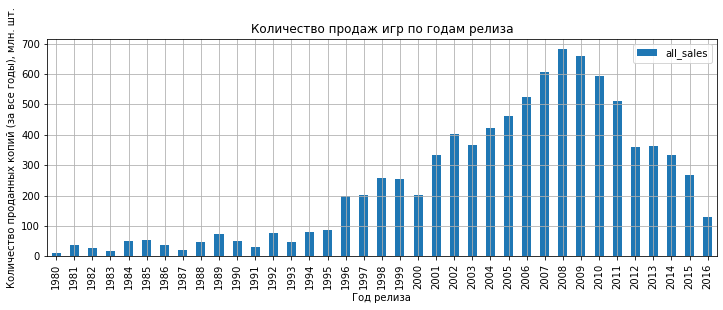

In [14]:
data.pivot_table(index='year_of_release', values='all_sales', aggfunc=('sum')).plot(kind='bar', grid=True, figsize=(12, 4))
plt.title("Количество продаж игр по годам релиза")
plt.ylabel("Количество проданных копий (за все годы), млн. шт.")
plt.xlabel("Год релиза");

In [15]:
len(data.query('year_of_release<1996'))/len(data) #доля игр выпущенных до 1996г.

0.04218273200502603

Очевидно что рассматривать игры выпущенные до 1996г. (менее 5%) в данном исследовании не целесообразно, но возможно стоит "ужать" временные рамки до еще меньшего интервала? Посмотрим на количество и продажи игр, выпущенных до 2001г.

In [16]:
len(data.query('year_of_release<2001'))/len(data) #доля игр, выпущенных до 2001г.

0.13923293244779514

In [17]:
data[data['year_of_release']<2001]['all_sales'].sum()/data['all_sales'].sum() #Доля в продажах игр, выпущенных до 2001г.

0.20862891255641852

<a name="s3_2"></a>
#### Изменение популярности жанров с течением времени

Без анализа отбросить почти 14% строк и более 20% продаж было бы неосмотрительно. Посмотрим как изменились жанры выпускаемых игр:

In [18]:
years = pd.cut(data['year_of_release'], [1979, 1995, 2000, 2016]) #разобьем годы выпуска игр на 3 периода
# посчитаем количество релизов каждого жанра в этих временных границах
janres_releases = data.pivot_table(index='genre', columns=years, values='name', aggfunc='count')
janres_releases.set_axis(['1980-1995_releases', '1996-2000_releases', '2001-2016_releases'], axis='columns', inplace=True)
# найдем долю релизов каждого жанра
for column in janres_releases.columns:
    janres_releases[column] = janres_releases[column]/janres_releases[column].sum()*100
print(janres_releases)
print()
# посчитаем продажи по каждому жанру
janres_sales = data.pivot_table(index='genre', columns=years, values='all_sales', aggfunc='sum')
janres_sales.set_axis(['1980-1995_sales', '1996-2000_sales', '2001-2016_sales'], axis='columns', inplace=True)
# доля продаж
for column in janres_sales.columns:
    janres_sales[column] = janres_sales[column]/janres_sales[column].sum()*100
print(janres_sales)

              1980-1995_releases  1996-2000_releases  2001-2016_releases
genre                                                                   
Action                 14.730539           11.390887           21.537258
Adventure               4.550898            5.695444            8.255119
Fighting               10.059880            9.232614            4.294653
Misc                    6.706587            6.474820           11.170364
Platform               10.658683            6.115108            4.891923
Puzzle                  6.347305            3.537170            3.277873
Racing                  5.269461           12.170264            7.032139
Role-Playing            9.940120            8.333333            8.973265
Shooter                10.179641            6.774580            7.913823
Simulation              3.952096            4.556355            5.339875
Sports                 13.413174           19.124700           13.523891
Strategy                4.191617            6.59472

Безусловно стоит "отсечь" игры выпущенные ранее 2001г. 

<div class="alert alert-warning">
<h2> Комментарий ревьюера 2</h2>

Таблицы на печать выводи с помощью метода display. 

</div>

<a name="s3_3"></a>
#### "Рождение" и "смерть" платформы

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: all_sales, dtype: float64


platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
2014,NaN,NaN,43.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.75,22.03,34.74,NaN,54.07
2015,NaN,NaN,27.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.14,16.35,11.96,NaN,60.14
2016,NaN,NaN,15.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.18,4.60,1.52,NaN,26.15


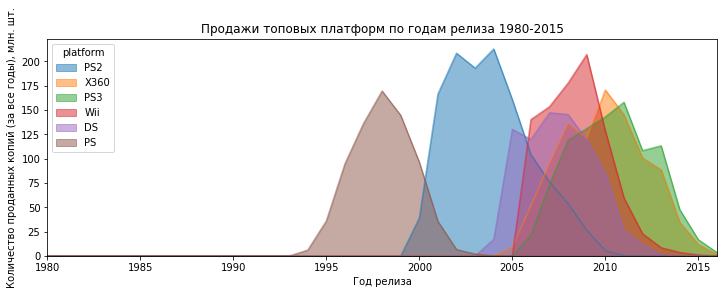

In [19]:
# Рассмотрим наиболее популярные платформы.
top_platform_sales = data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(6)
print(top_platform_sales)

# Продажи платформ по годам релиза
platform_sales_by_years = data.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
display(platform_sales_by_years.tail(3))

# Продажи топовых платформ по годам релиза
top_platform_sales_by_years = platform_sales_by_years.loc[:, top_platform_sales.index]

top_platform_sales_by_years.plot.area(stacked=False, figsize=(12, 4))
plt.title("Продажи топовых платформ по годам релиза 1980-2015")
plt.ylabel("Количество проданных копий (за все годы), млн. шт.")
plt.xlabel("Год релиза");

Из графиков видно что от "рождения" до "смерти" платформы проходит около 10 лет.  

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Значение средней продолжительности существования платформы приведено. Однако выводы ты делаешь по графику. Стоит также привести расчет данного значения. Подумай, стоит ли включать в расчет все платформы. Будут ли выбросы по продолжительности существования платформ?

</div>

In [20]:
game_release_by_platform = data.pivot_table(index='name', columns='platform', values='year_of_release')
display(game_release_by_platform.head(3))
lifetime = game_release_by_platform.describe().T
lifetime['lifetime'] = lifetime['max']-lifetime['min']+1
# так как нас не интересуют "древние" платформы, а актуальные платформы еще "живы" отсечем их по условию:
#                            дата выпуска первой игры >1990 и <2010


platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,,,,,,
Beyblade Burst,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,NaN,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,NaN,NaN,2013.0,NaN,2013.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


так как нас не интересуют "древние" платформы, а актуальные платформы еще "живы" отсечем их по условию: дата выпуска первой игры >1990 и есть игры выпущенные в 2016. Такой срез также исключит не нужный нам PC.

,count,mean,std,min,25%,50%,75%,max,lifetime
platform,,,,,,,,,
3DO,3.0,1994.666667,0.577350,1994.0,1994.50,1995.0,1995.00,1995.0,2.0
3DS,515.0,2013.093204,1.747442,2000.0,2012.00,2013.0,2015.00,2016.0,17.0
DC,52.0,1999.942308,1.808623,1998.0,1999.00,2000.0,2000.00,2008.0,11.0
GBA,813.0,2003.216482,1.477207,2000.0,2002.00,2003.0,2004.00,2007.0,8.0
GC,552.0,2003.394928,1.392165,2001.0,2002.00,2003.0,2005.00,2007.0,7.0
GEN,27.0,1993.037037,1.091276,1990.0,1992.00,1993.0,1994.00,1994.0,5.0
GG,1.0,1992.000000,NaN,1992.0,1992.00,1992.0,1992.00,1992.0,1.0
N64,318.0,1998.550314,1.256773,1996.0,1998.00,1999.0,1999.00,2004.0,9.0
NG,12.0,1994.500000,1.000000,1993.0,1994.00,1994.5,1995.00,1996.0,4.0


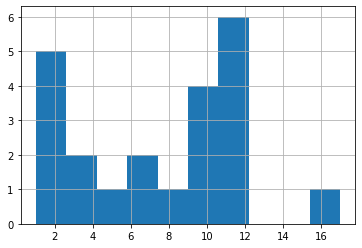

In [21]:
display(lifetime.query('min>1989 and min<2010'))
lifetime.query('min>1989 and min<2010')['lifetime'].hist()


<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Есть "неудачные" платформы живущие 1-2 года, но в основном игры для одной консоли выпускают в течении 10-12 лет. Отдельно можно сказать про 3DS, появившуюся в 2000 году и сохранившую поклонников до сегодняшнего дня (17 лет).
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Отлично, расчет приведен. Верно, что ты не стал включать в него актуальные на настоящий момент платформы. Период их жизни еще продолжается. 

</div>

Игровая индустрия - область изменчивая как в плане моды на определенные жанры (очевидно увеличение популярности жанра 'Action' и угасание 'Platform' и пр.), так и в техническом плане (изменение возможностей современных ПК и выход новых игровых консолей). 
##### В исследовании целесообразно учесть тенденции последних 6-8 лет (с 2008 года).

In [22]:
data_2008 = data.query('year_of_release>2007')
display(data_2008.head(50))
data_2008.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.296875,06+ (E),35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.000000,06+ (E),32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.398438,06+ (E),28.32
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.300781,06+ (E),21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80,7.398438,06+ (E),21.80
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.203125,17+ (M),21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.101562,17+ (M),16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.400391,17+ (M),14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8192 entries, 2 to 16714
Data columns (total 12 columns):
name               8192 non-null object
platform           8192 non-null object
year_of_release    8192 non-null Int16
genre              8192 non-null object
na_sales           8192 non-null float64
eu_sales           8192 non-null float64
jp_sales           8192 non-null float64
other_sales        8192 non-null float64
critic_score       3719 non-null Int8
user_score         3808 non-null float16
rating             5151 non-null object
all_sales          8192 non-null float64
dtypes: Int16(1), Int8(1), float16(1), float64(5), object(4)
memory usage: 696.0+ KB


Отсеяв строки с датой релиза до 2008 года имеем 8192 строки (чуть меньше половины перврначального сета - 16713). 

In [23]:
# Рассмотрим наиболее популярные платформы.
top_platform_sales_2008 = data_2008.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(7)
print(top_platform_sales_2008)

platform
PS3     840.37
X360    810.19
Wii     609.71
DS      389.81
PS4     314.14
3DS     258.51
XOne    159.32
Name: all_sales, dtype: float64


<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Актуальный период назван. Лучше его уменьшить. Сейчас у тебя в периоде содержится 2 этапа развития индустрии: пик 2008 и 2009 годов, а также сокращение рынка последних годов. Также большей части платформ уже нет в 2016 году, в построении прогноза на 2017 год они нам не помогут. При уменьшении периода в рассмотрение попадут только последние поколения платформ, а также будем рассматривать только конечный на данный момент интервал развития игровой индустрии. 

</div>

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Сголасен, но обрубив данные более поздним годом в частности потеряем портативные консоли 3DS (уступила позиции, но еще жива и занимает свою нишу) и безусловного лидера Wii (в настоящее время не поддерживается, но внесла серьезный вклад). Также не будет видна приемственность PS3/PS4 и X360/XOne и изменчивость пользовательских предпочтений. В дальнейшем анализе использую данные 2008-2016гг. и где требуется отдельно анализирую 2013-2016гг.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Ок, с твоей позицией также согласен. Но тогда встает вопрос: как определить, в каком анализе какой период брать? Все же основная задача исследования - построить прогноз на 2017 год. Это мы можем сделать лишь при анализе данных последнего времени.  

</div>

<a name="s3_4"></a>
#### Продажи и релизы разных платформ по годам релиза. ТОП 2008-2016

platform,3DS,DC,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,
2014,43.76,NaN,NaN,13.63,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,NaN,54.07
2015,27.78,NaN,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,NaN,60.14
2016,15.14,NaN,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,NaN,26.15


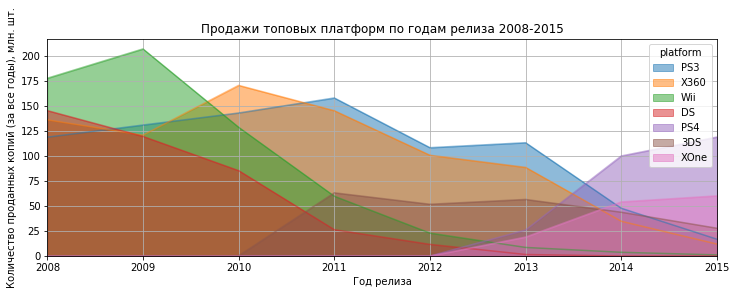

In [24]:
# Продажи платформ по годам релиза
platform_sales_2008_by_years = data_2008.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
display(platform_sales_2008_by_years.tail(3))

# Продажи топовых платформ по годам релиза
top_platform_sales_2008_by_years = platform_sales_2008_by_years.loc[:, top_platform_sales_2008.index]


# Год ограничен 2015 т.к. данные по 2016 не полные и графики дают обманчивое представление
top_platform_sales_2008_by_years.query('year_of_release<2016').plot.area(stacked=False, grid=True, figsize=(12, 4)) #
plt.title("Продажи топовых платформ по годам релиза 2008-2015")
plt.ylabel("Количество проданных копий (за все годы), млн. шт.")
plt.xlabel("Год релиза");

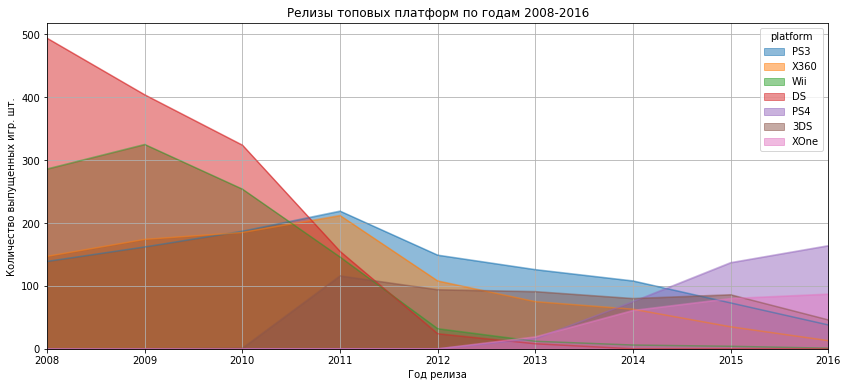

In [25]:
# Релизы по годам
platform_releases_2008_by_years = data_2008.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')
top_platform_releases_2008_by_years = platform_releases_2008_by_years.loc[:, top_platform_sales_2008.index]
top_platform_releases_2008_by_years.plot.area(stacked=False, grid=True, figsize=(14, 6))
plt.title("Релизы топовых платформ по годам 2008-2016")
plt.ylabel("Количество выпущенных игр. шт.")
plt.xlabel("Год релиза");

#### Среди популярных платформ имеем следующую картину:  
* В 2009 году явно лидирует Wii с рекордными 200 млн. продаж., результаты падающей DS и растущих PS3 и X360 в районе 125 млн. 
* с 2010 по 2013 в лидерах PS3 и X360 и на заднем плане 3DS
* c 2013 набирают популярность PS4 и XOne  

Можно предположить что в 2017 или немного позже PS4 и XOne достигнут пика популярности. Далее необходимо отслеживать появление консолей которые придут им на замену.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Да, именно вышеназванные платформы мы и можем назвать перспективными на 2017 год. 

</div>

<a name="s3_5"></a>
#### Продажи игр по платформе

platform,PS3,X360,Wii,DS,PS4,3DS,XOne
name,,,,,,,
Beyblade Burst,NaN,NaN,NaN,NaN,NaN,0.03,NaN
Fire Emblem Fates,NaN,NaN,NaN,NaN,NaN,1.67,NaN
Frozen: Olaf's Quest,NaN,NaN,NaN,0.51,NaN,0.59,NaN


platform,PS3,X360,Wii,DS,PS4,3DS,XOne
count,1200.000000,1012.000000,1066.000000,1409.000000,392.000000,514.000000,247.000000
mean,0.699238,0.800583,0.571961,0.276657,0.801378,0.502938,0.645020
std,1.421279,1.692087,2.043555,0.741744,1.609456,1.438494,1.036139
min,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.100000,0.110000,0.090000,0.040000,0.060000,0.050000,0.060000
50%,0.260000,0.280000,0.190000,0.100000,0.200000,0.125000,0.220000
75%,0.740000,0.790000,0.460000,0.250000,0.730000,0.337500,0.685000
max,21.050000,21.820000,35.520000,15.130000,14.630000,14.600000,7.390000


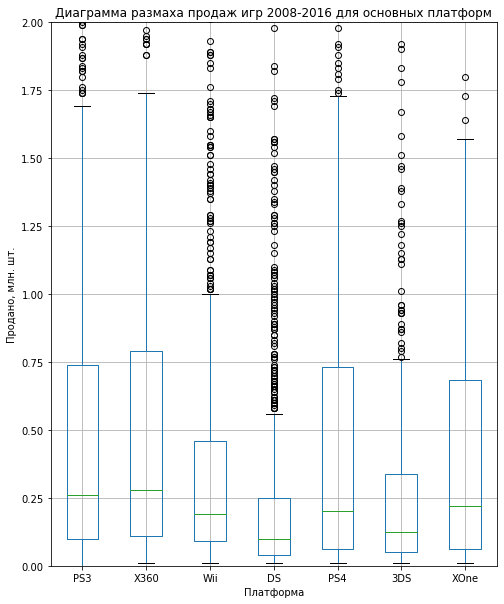

In [26]:
platform_sales_2008_by_name = data_2008.pivot_table(index='name', columns='platform', values='all_sales')
top_platform_sales_2008_by_name = platform_sales_2008_by_name.loc[:, top_platform_sales_2008.index]
display(top_platform_sales_2008_by_name.head(3))
top_platform_sales_2008_by_name.plot.box(figsize=(8, 10), ylim=(0, 2), grid=True)
plt.title("Диаграмма размаха продаж игр 2008-2016 для основных платформ")
plt.ylabel("Продано, млн. шт.")
plt.xlabel("Платформа");
top_platform_sales_2008_by_name.describe()

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

С предупреждениями также стоит разобраться. Иногда их бывает слишком много, поэтому важно уметь их скрывать. В этом тебе поможет библиотека warnings. Попробуй найти подходящий метод и убрать предупреждения.  

</div>

<div class="alert alert-block alert-info">
<b>Fixed:</b>
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

👍 

</div>

Медианы между 0,1 и 0,3 млн. (средняя игра продается в количестве 200 тыс. экземпляров). Разброс очень большой. Популярные игры (не говоря уже про "хиты") продаются с большим отрывом от медианных и средних значений. 

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>
 
Подумай, из-за чего формируется разница между платформами. Старайся не только описывать результат, но и трактовать его. 

</div>

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
    
 * 3DS - нишевая портативная консоль с не очень высокими продажами, 
    
 * для DS выпускалось огромное количество игр, между которыми "размазаны" высокие в целом продажи, что дает невысокие средние показатели,  
    
 * Wii имеет безусловных лидеров с огромными продажами, но продажи большинства игр ниже среднего. 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Форм-фактор оказывает свое влияние. Верное наблюдение. Также влияет и число активных платформ на рынке. 
</div>

<a name="s3_6"></a>
#### Зависимость отзывов и продаж

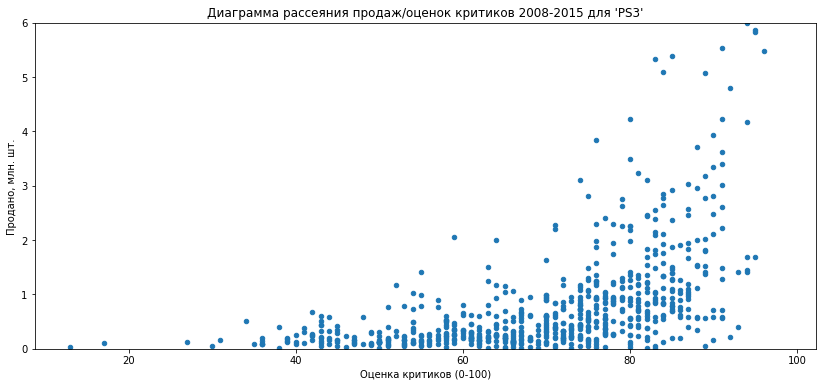

Коэффицициент корреляции Пирсона (продажи и оценки критиков) для PS3: 0.43347491145934136


In [27]:
data_08_15_PS3 = data_2008.query('platform=="PS3"')
data_08_15_PS3.plot.scatter(x='critic_score', y='all_sales', ylim=(0, 6), figsize=(14, 6));
plt.title("Диаграмма рассеяния продаж/оценок критиков 2008-2015 для 'PS3'")
plt.ylabel("Продано, млн. шт.")
plt.xlabel("Оценка критиков (0-100)")
plt.show()
corr1 = data_08_15_PS3['all_sales'].corr(data_08_15_PS3['critic_score'].astype('float'))
print('Коэффицициент корреляции Пирсона (продажи и оценки критиков) для PS3:', corr1)

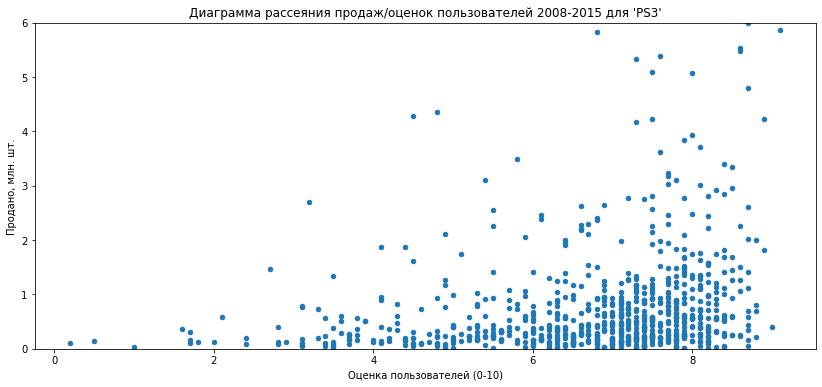

Коэффицициент корреляции Пирсона (продажи и оценки пользователей) для PS3: 0.11337287218931807


In [28]:
data_08_15_PS3.plot.scatter(x='user_score', y='all_sales', ylim=(0, 6), figsize=(14, 6));
plt.title("Диаграмма рассеяния продаж/оценок пользователей 2008-2015 для 'PS3'")
plt.ylabel("Продано, млн. шт.")
plt.xlabel("Оценка пользователей (0-10)")
plt.show()
corr1 = data_08_15_PS3['all_sales'].corr(data_08_15_PS3['user_score'])
print('Коэффицициент корреляции Пирсона (продажи и оценки пользователей) для PS3:', corr1)

Диаграммы (для PS3 в 2008-2015гг.) показывают что зависимость успешности игры и её оценок прослеживается, но не всегда очевидна.  
При принятии решения о покупке (или не покупке) игры рейтинг чаще не является весомым фактором.  
Сравнивая оценки критиков и пользователей можно сделать вывод что критики более объективны. Вероятно на оценки пользователей влияют личные предпочтения и прочие субъективные факторы. Подобная картина характерна также для других платформ.

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Результат получен. Здорово, что ты проанализировал причины появления такого результата. Однако стоит оценить и результаты по другим платформам. Сделать надежные выводы лишь по одной платформе мы не можем. 
</div>

In [29]:
for platf in top_platform_sales_2008.index:
    data_corr = data_2008[data_2008['platform']==platf]
    corr1 = data_corr['all_sales'].corr(data_corr['critic_score'].astype('float'))
    print('Коэффицициент корреляции Пирсона (продажи и оценки критиков) для', platf, ':', corr1)
print()
for platf in top_platform_sales_2008.index:
    data_corr = data_2008[data_2008['platform']==platf]
    corr1 = data_corr['all_sales'].corr(data_corr['user_score'])
    print('Коэффицициент корреляции Пирсона (продажи и оценки пользователей) для', platf, ':', corr1)

Коэффицициент корреляции Пирсона (продажи и оценки критиков) для PS3 : 0.43347491145934136
Коэффицициент корреляции Пирсона (продажи и оценки критиков) для X360 : 0.3874569640137433
Коэффицициент корреляции Пирсона (продажи и оценки критиков) для Wii : 0.2269370380026253
Коэффицициент корреляции Пирсона (продажи и оценки критиков) для DS : 0.30398903189239546
Коэффицициент корреляции Пирсона (продажи и оценки критиков) для PS4 : 0.406567902061781
Коэффицициент корреляции Пирсона (продажи и оценки критиков) для 3DS : 0.34821555174929825
Коэффицициент корреляции Пирсона (продажи и оценки критиков) для XOne : 0.41699832800840175

Коэффицициент корреляции Пирсона (продажи и оценки пользователей) для PS3 : 0.11337287218931807
Коэффицициент корреляции Пирсона (продажи и оценки пользователей) для X360 : 0.09967701942638876
Коэффицициент корреляции Пирсона (продажи и оценки пользователей) для Wii : 0.131307502994988
Коэффицициент корреляции Пирсона (продажи и оценки пользователей) для DS : 0.1

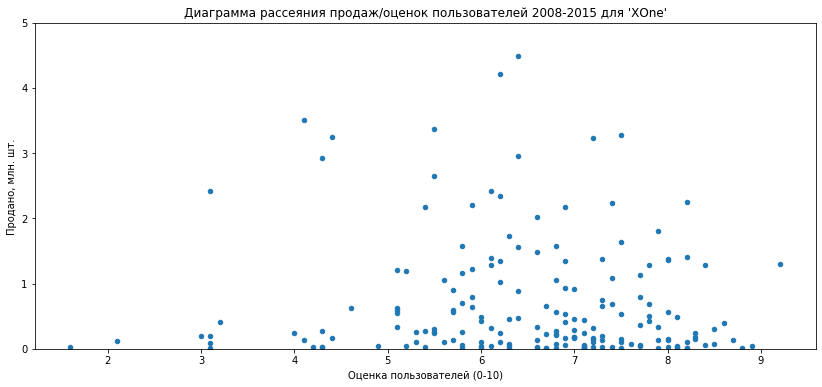

Коэффицициент корреляции Пирсона (продажи и оценки пользователей) для XOne: -0.06905640851259726


In [30]:
data_08_15_PS3 = data_2008.query('platform=="XOne"')
data_08_15_PS3.plot.scatter(x='user_score', y='all_sales', ylim=(0, 5), figsize=(14, 6));
plt.title("Диаграмма рассеяния продаж/оценок пользователей 2008-2015 для 'XOne'")
plt.ylabel("Продано, млн. шт.")
plt.xlabel("Оценка пользователей (0-10)")
plt.show()
corr1 = data_08_15_PS3['all_sales'].corr(data_08_15_PS3['user_score'].astype('float'))
print('Коэффицициент корреляции Пирсона (продажи и оценки пользователей) для XOne:', corr1)

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Подобная картина характерна также для других платформ.  
Ориентироваться на оценки пользователей для новых платформ (PS-4, XOne) нельзя. Возможно связано с высокими оценками до покупки или на старте продаж.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Анализ иных платформ проведен. Так мы можем подтвердить выводы, сделанные ранее. 

</div>

In [31]:
data_2008.query("platform=='PS3'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.203125,17+ (M),21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.300781,17+ (M),13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88,3.199219,17+ (M),13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88,6.398438,17+ (M),12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84,7.500000,06+ (E),10.70
...,...,...,...,...,...,...,...,...,...,...,...,...
16639,WSC REAL 09: World Snooker Championship,PS3,2009,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


<a name="s3_7"></a>
#### Успешность игр в зависимости от жанров

In [32]:
# Количество игр и суммарные продажи по жанрам
world_janres_2008 = data_2008.pivot_table(index='genre', values='all_sales', aggfunc=('count', 'sum', 'mean'))
world_janres_2008.set_axis(['games_quantity', 'average_sales', 'sum_sales'], axis='columns', inplace=True)
display(world_janres_2008)
print()


,games_quantity,average_sales,sum_sales
genre,,,
Action,2010,0.477612,960.00
Adventure,870,0.121701,105.88
Fighting,310,0.479806,148.74
Misc,1004,0.396574,398.16
Platform,244,0.800738,195.38
Puzzle,260,0.216308,56.24
Racing,405,0.559235,226.49
Role-Playing,784,0.537781,421.62
Shooter,591,1.034129,611.17


Статистика по продажам игр разного жанра (по миру):
* Наиболее популярные жанры (по убыванию): Action, Shooter, Sports. 
* Менее популярные: Role-Playing, Misc, Racing, Platform
* Редкие: Fighting, Simulation, Adventure, Strategy, Puzzle  

При этом "средний" Shooter почти в двое популярнее "средней" игры жанра Action (из за разного количества выпускаемых игр разных жанров).

<a name="s3_7_1"></a>
Посмотрим какая картина среди лидеров продаж (игры с продажами более 2 млн.).

In [33]:
world_janres_2008_TOP = data_2008.query('all_sales>2').pivot_table(index='genre', values='all_sales', 
                                                                   aggfunc=('count', 'sum', 'mean')).reset_index()
world_janres_2008_TOP.set_axis(['genre', 'games_quantity', 'average_sales', 'sum_sales'], axis='columns', inplace=True)
world_janres_2008_TOP['sales_%']=world_janres_2008_TOP['sum_sales']/world_janres_2008_TOP['sum_sales'].sum()*100
display(world_janres_2008_TOP)
# world_janres_2008_TOP.plot.bar(y='sum_sales', figsize=(6, 6), legend=False, color='lime',
#                title='Продажи по жанрам среди игр с продажами свыше 2 млн. за 2008-2016гг.'); # .pie autopct='%.1f'

,genre,games_quantity,average_sales,sum_sales,sales_%
0,Action,90,4.225222,380.27,21.955416
1,Adventure,4,3.010000,12.04,0.695146
2,Fighting,11,4.285455,47.14,2.721693
3,Misc,33,4.541212,149.86,8.652375
4,Platform,18,5.812222,104.62,6.040381
5,Puzzle,4,2.692500,10.77,0.621821
6,Racing,19,5.735263,108.97,6.291534
7,Role-Playing,45,4.627556,208.24,12.023025
8,Shooter,73,5.369863,392.00,22.632664
9,Simulation,10,4.405000,44.05,2.543288


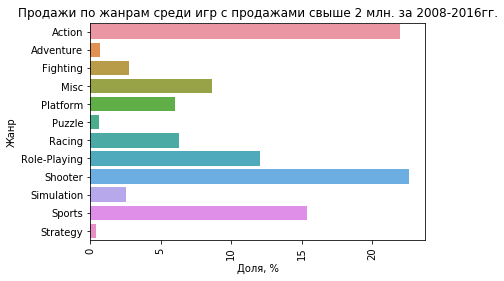

In [34]:
ax = sns.barplot(y='genre', x="sales_%", data=world_janres_2008_TOP, dodge=False)
plt.xticks(rotation=90)
plt.title("Продажи по жанрам среди игр с продажами свыше 2 млн. за 2008-2016гг.")
plt.ylabel("Жанр")
plt.xlabel("Доля, %");

Для популярных игр картина уже немного иная: лидируют Shooter, за ними Action и Sports

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Анализ популярности жанров проведен. Однако не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера</h2>
 
Не советую использовать пироговые диаграммы (pie-charts). Такая диаграмма затрудняет понимание, особенно если сегментов будет больше 4х. Также, на этом типе диаграмм сложно визуально увидеть разницу между сегментами. Рекомендую использовать обычные столбчатые диаграммы вместо пироговых диаграмм. 

</div>

<div class="alert alert-block alert-info">
<b>Fixed:</b>
</div>

[вернуться к оглавлению](#plan) 
<a name="s4"></a>
### Шаг 4. Портрет пользователя каждого региона.
#### Самые популярные платформы
В данной части учитывать устаревшие платформы будет неправильно. Посмотрим ТОП-5 актуальных на 2016г. платформ и оценим продажи за 2013-2016гг.

In [35]:
# ТОП-5 платформ по проданным играм в 2016г.
top5_platform = data_2008.query(
    'year_of_release==2016').groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(5)
print(top5_platform)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
Name: all_sales, dtype: float64


In [36]:
print('Доля продаж игр для разных платформ по регионам 2013-2016гг.')
# Продажи по регионам 2013-2016г. 
platform_by_region = data_2008.query('year_of_release>2012').pivot_table(
    index='platform', values=['all_sales', 'na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

# Продажи по регионам для 5 актуальных платформ 2013-2016г. 
platform_by_region5 = data_2008.query('year_of_release>2012 and platform in @top5_platform.index').pivot_table(
    index='platform', values=['all_sales', 'na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

print()
# Доля в процентах с учетом не вошедших в ТОП-5
for column in platform_by_region5.columns:
    platform_by_region5[column] = platform_by_region5[column]/platform_by_region[column].sum()*100
platform_by_region5.set_axis(['all_sales_%', 'eu_sales_%', 'jp_sales_%', 'na_sales_%'], axis='columns', inplace=True)
display(platform_by_region5)

Доля продаж игр для разных платформ по регионам 2013-2016гг.



,all_sales_%,eu_sales_%,jp_sales_%,na_sales_%
platform,,,,
3DS,13.123420,7.883680,48.085378,8.725645
PC,3.669977,6.579919,0.000000,2.556020
PS4,28.778995,35.927275,11.317544,24.838393
WiiU,5.920884,5.054620,7.715218,6.672149
XOne,14.595625,13.136920,0.241101,21.270472


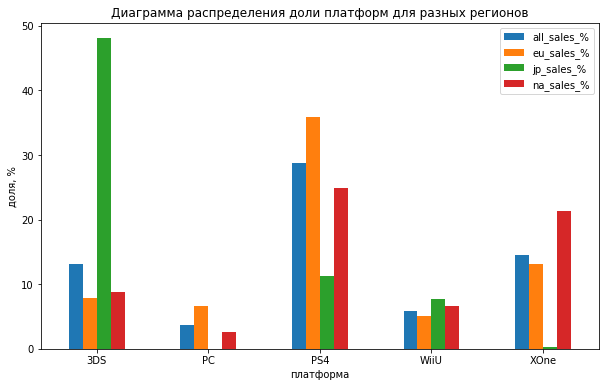

In [37]:
platform_by_region5.plot.bar(figsize=(10, 6))
plt.title('Диаграмма распределения доли платформ для разных регионов')
plt.ylabel('доля, %')
plt.xlabel('платформа')
plt.xticks(rotation=0);

* В Японии не принято играть на PC. Из-за высокого ритма жизни там чаще используют для игр портативные консоли (3DS, реже WiiU), позволяющие играть в транспорте, общественных местах и "на бегу". Для дома выбирают PS4. Родина игровых девайсов (Nintendo, Sony и пр.) в заморской диковинке XOne от Microsoft не нуждается.
* Северная Америка разделилась между PS4 и конкурирующей с ней XOne, также свою нишу портативных консолей занимают 3DS и WiiU.
* Европе "милее" PS4, доля XOne почти втрое меньше. Как и в США+Канаде есть продажи игр для портативных консолей, но есть и любители игр для персонального компьютера.

<a name="s4_2"></a>
#### Самые популярные жанры.

Вкусовые предпочтения игроков меняются медленнее чем консоли - поэтому можно анализировать 2008-2016гг.

In [38]:
# ТОП-5 жанров по продажам с 2008г. по 2016г.
top5_genres = data_2008.groupby('genre')['all_sales'].sum().sort_values(ascending=False).head(5)
print(top5_genres)

genre
Action          960.00
Shooter         611.17
Sports          563.04
Role-Playing    421.62
Misc            398.16
Name: all_sales, dtype: float64


In [39]:
print('Доля продаж игр ТОП-5 жанров по регионам 2008-2016гг.')
# Продажи по жанрам 2008-2016г. 
genres_by_region = data_2008.pivot_table(
    index='genre', values=['all_sales', 'na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

# Продажи по жанрам из ТОП-5 2008-2016г.
genres_by_region5 = data_2008.query('genre in @top5_genres.index').pivot_table(
    index='genre', values=['all_sales', 'na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

# Доля в процентах с учетом не вошедших в ТОП-5
for column in genres_by_region.columns:
    genres_by_region5[column] = genres_by_region5[column]/genres_by_region[column].sum()*100
genres_by_region5.set_axis(['all_sales_%', 'eu_sales_%', 'jp_sales_%', 'na_sales_%'], axis='columns', inplace=True)
display(genres_by_region5)

print()
print ('Доля продаж игр ТОП-5 жанров по регионам 2013-2016гг.')
# Продажи по жанрам 2013-2016г. 
genres_by_region = data_2008.query('year_of_release>2012').pivot_table(
    index='genre', values=['all_sales', 'na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

# Продажи по жанрам из ТОП-5 2013-2016г.
genres_by_region5 = data_2008.query('year_of_release>2012 and genre in @top5_genres.index').pivot_table(
    index='genre', values=['all_sales', 'na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

# Доля в процентах с учетом не вошедших в ТОП-5
for column in genres_by_region.columns:
    genres_by_region5[column] = genres_by_region5[column]/genres_by_region[column].sum()*100
genres_by_region5.set_axis(['all_sales_%', 'eu_sales_%', 'jp_sales_%', 'na_sales_%'], axis='columns', inplace=True)
display(genres_by_region5)

Доля продаж игр ТОП-5 жанров по регионам 2008-2016гг.


,all_sales_%,eu_sales_%,jp_sales_%,na_sales_%
genre,,,,
Action,24.627509,25.919813,21.034829,24.157017
Misc,10.214259,8.793753,8.946276,11.615340
Role-Playing,10.816094,7.755910,32.232253,8.530289
Shooter,15.678744,17.216379,3.720811,17.109852
Sports,14.444034,15.273707,7.220006,15.193671



Доля продаж игр ТОП-5 жанров по регионам 2013-2016гг.


,all_sales_%,eu_sales_%,jp_sales_%,na_sales_%
genre,,,,
Action,29.544872,30.202949,28.712239,28.810617
Misc,5.777053,5.103002,6.694086,6.279266
Role-Playing,13.365275,9.414071,36.193448,10.598689
Shooter,21.343765,22.372743,4.687278,25.066813
Sports,13.801349,15.410863,3.836335,14.908975


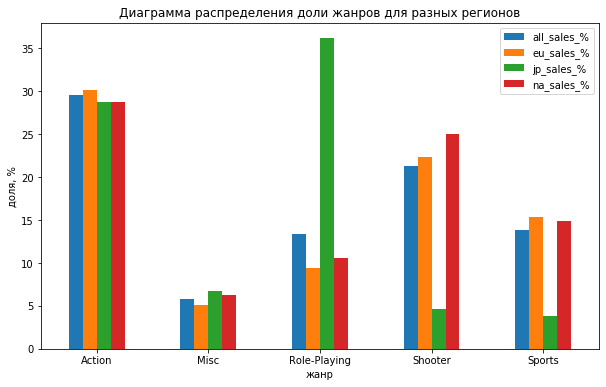

In [40]:
genres_by_region5.plot.bar(figsize=(10, 6))
plt.title('Диаграмма распределения доли жанров для разных регионов')
plt.ylabel('доля, %')
plt.xlabel('жанр')
plt.xticks(rotation=0);

Все любят Action. Северная америка и Европа кроме того играют в Shooter и Sports, а в Японии эти два жанра отдают свои проценты в пользу Role-Playing - традиционно Японского жанра, занимающего там 1 место.  
За последние 4 года интерес игроков немного сместился от Misc и Sports к Action, Shooter и Role-Playing.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
 
Из-за чего японский рынок игр так сильно отличается от других? 

</div>

<div class="alert alert-block alert-info">
<b>Fixed:</b>
    Тема для отдельного исследования.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

В целом, мы можем сказать, что культура данной страны отличается от других, что и влияет на игровой рынок. 

</div>

<a name="s4_3"></a>
#### Рейтинг ESRB и продажи в регионах.

In [41]:
data_2008['rating']=data_2008['rating'].fillna('0')

In [42]:
print('Доля продаж игр разного рейтинга ESRB по регионам 2008-2016гг.')
# Продажи по рейтингу ESRB 2008-2016г.
ESRB_by_region = data_2008.pivot_table(
    index='rating', values=['all_sales', 'na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
#display(ESRB_by_region)

# Доля в процентах
for column in ESRB_by_region.columns:
    ESRB_by_region[column] = ESRB_by_region[column]/ESRB_by_region[column].sum()*100
ESRB_by_region.set_axis(['all_sales_%', 'eu_sales_%', 'jp_sales_%', 'na_sales_%'], axis='columns', inplace=True)
display(ESRB_by_region)

print()
print ('Доля продаж игр разного рейтинга ESRB по регионам 2013-2016гг.')
# Продажи по рейтингу ESRB 2013-2016г.
ESRB_by_region = data_2008.query('year_of_release>2012').pivot_table(
    index='rating', values=['all_sales', 'na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

# Доля в процентах
for column in ESRB_by_region.columns:
    ESRB_by_region[column] = ESRB_by_region[column]/ESRB_by_region[column].sum()*100
ESRB_by_region.set_axis(['all_sales_%', 'eu_sales_%', 'jp_sales_%', 'na_sales_%'], axis='columns', inplace=True)
display(ESRB_by_region)

Доля продаж игр разного рейтинга ESRB по регионам 2008-2016гг.


,all_sales_%,eu_sales_%,jp_sales_%,na_sales_%
rating,,,,
0,17.728985,15.540557,51.771759,12.007336
06+ (E),27.049471,26.845169,18.002193,29.543675
10+ (E10+),12.452797,12.187272,5.988289,14.124990
13+ (T),16.246460,15.448596,15.055870,16.685007
17+ (M),26.522288,29.978406,9.181888,27.638992



Доля продаж игр разного рейтинга ESRB по регионам 2013-2016гг.


,all_sales_%,eu_sales_%,jp_sales_%,na_sales_%
rating,,,,
0,25.383854,20.093708,60.480783,20.425318
06+ (E),18.337059,21.226860,10.736066,18.056602
10+ (E10+),10.571109,10.870617,4.176713,12.389502
13+ (T),11.599912,10.682183,14.600766,11.373033
17+ (M),34.108066,37.126633,10.005673,37.755545


В Японии предпочтения по возрастному рейтингу смещены от игр 17+(M) к играм 13+(T) а также от 10+(E10+) к 06+(E).  
В целом (для 2013-2016 по отношению к 2008-2016) можно отметить рост доли "взрослых" (17+) игр за счет снижения "детских" (6+). Возможно это связано с "взрослением" среднего геймера.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

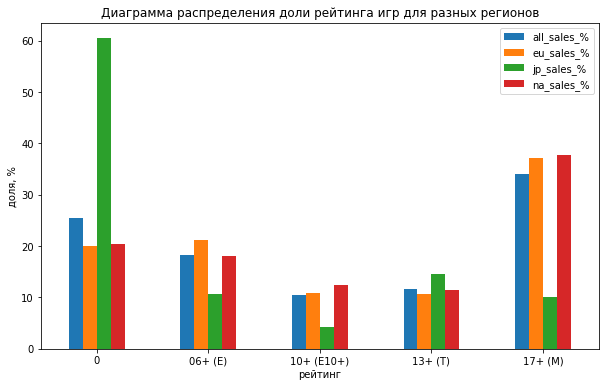

In [43]:
ESRB_by_region.plot.bar(figsize=(10, 6))
plt.title('Диаграмма распределения доли рейтинга игр для разных регионов')
plt.ylabel('доля, %')
plt.xlabel('рейтинг')
plt.xticks(rotation=0)

<div class="alert alert-danger">
<h2> Комментарий ревьюера</h2>

Обрати внимание - ты не учитываешь игры без рейтинга. В результате огромная часть игр просто выпадает из анализа. Найди способ учесть их при группировке значений по рейтингу.
    
</div>

<div class="alert alert-block alert-info">
<b>Fixed:</b>
    Заполнил '0'. Наличие большого количества пропусков в Японии возможно связано с популярностью там жанра Role-Playing и игр собственной разработки. Такие игры в основном нацелены на "внутренний рынок" и не требуют обязательной оценки по американской системе рейтингов ESRB.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Круто, что ты не просто отметил особенность японского региона, но и обосновал причину появления такого результата, молодец. 

</div>

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>

Портрет типичного пользователя каждого из регионов получен. Стоит визуализировать все полученные таблицы. Уж очень не хватает графиков в данном разделе работы. 

</div>

<div class="alert alert-block alert-info">
<b>Fixed:</b>
    Готово.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Старайся всегда визуализировать получаемую в работе информацию.

</div>

[вернуться к оглавлению](#plan) 
<a name="s5"></a>
### Шаг 5. Проверка гипотез.
#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?
Сформулируем нулевую гипотезу следующим образом: средние пользовательские рейтинги платформ Xbox One и PC равны.
Тогда альтернативная гипотеза будет звучать так: средние пользовательские рейтинги платформ Xbox One и PC разные.

In [44]:
print('Дисперсия пользовательских рейтингов для XOne: {:.2f} баллов в квадрате'.format(np.var(
        data_2008.query('platform=="XOne"')['user_score'], ddof=1)))

print('Дисперсия пользовательских рейтингов для PC: {:.2f} баллов в квадрате'.format(np.var(
        data_2008.query('platform=="PC"')['user_score'], ddof=1)))

Дисперсия пользовательских рейтингов для XOne: 1.91 баллов в квадрате
Дисперсия пользовательских рейтингов для PC: 2.35 баллов в квадрате


In [45]:
alpha = .05

results = st.ttest_ind(
    data_2008.query('platform=="XOne"')['user_score'].dropna(), 
    data_2008.query('platform=="PC"')['user_score'].dropna(), 
    equal_var = False) #т.к. дисперсии для тарифов различны

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09743722496022197
Не получилось отвергнуть нулевую гипотезу


Возможно средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Гипотезы сформулированы и проверены верно.

</div>

<a name="s5_2"></a>
#### Средние пользовательские рейтинги жанров Action и Sports разные?
Сформулируем нулевую гипотезу следующим образом: средние пользовательские рейтинги жанров Action и Sports равны.
Тогда альтернативная гипотеза будет звучать так: средние пользовательские рейтинги жанров Action и Sports разные.

In [46]:
print('Дисперсия пользовательских рейтингов жанра Action: {:.2f} баллов в квадрате'.format(np.var(
        data_2008.query('genre=="Action"')['user_score'], ddof=1)))

print('Дисперсия пользовательских рейтингов жанра Sports: {:.2f} баллов в квадрате'.format(np.var(
        data_2008.query('genre=="Sports"')['user_score'], ddof=1)))

Дисперсия пользовательских рейтингов жанра Action: 1.79 баллов в квадрате
Дисперсия пользовательских рейтингов жанра Sports: 2.92 баллов в квадрате


In [47]:
alpha = .05

results = st.ttest_ind(
    data_2008.query('genre=="Action"')['user_score'].dropna(), 
    data_2008.query('genre=="Sports"')['user_score'].dropna(), 
    equal_var = False) #т.к. дисперсии для тарифов различны

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.3019533047680694e-13
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports отличаются с очень большой вероятностью. Случайность такого вывода крайне мала.

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Проверка второй гипотезы также осуществлена правильно. Уточнение параметра equal_var позволяет нам увеличить точность проводимых тестов. 
</div>

[вернуться к оглавлению](#plan) 
<a name="s6"></a>
### Шаг 6. Общий вывод.

Игровая индустрия очень изменчива. Пользовательские предпочтения и вкусы быстро меняются, возможности современных консолей и ПК поражают, а что будет завтра? В 2016 году было выпущено более 1100 игр для различных консолей и ПК. Топовые игры продаются десятками млн. копий, а 90% игр не "осилят" и 1 млн. Как не ошибиться? На что ориентироваться при выборе потенциально прибыльного продукта и планировании рекламной компании? 

При использовании исторических данных о продажах игр для определения особенностей потенциально успешной игры необходимо ориентироваться на "свежие" данные. Общие тенденции видны при анализе информации за последние 6-8 лет, а в части игрового "железа" ситуация может измениться за 2-3 года.

На сегодняшний день (2016г.) можно выделить 2 перспективные консоли с хорошей возможностью потенциального роста в 2017г: PS4 от Sony и наступающую ей на пятки в Америке и Европе XOne от Microsoft. Определенная доля рынка (особенно в Японии) перспективно сохранится за портативными консолями 3DS и WiiU. Но необходимо учитывать что "жизнь" консоли быстротечна, и своевременно отслеживать появление новинок.

Отзывы пользователей и рейтинги критиков не самый надежный фактор при выборе продукта. Исследование показало что зависимость успешности игры и её оценок прослеживается, но не всегда очевидна. Сравнивая оценки критиков и пользователей можно сделать вывод что критики более объективны.

Сравнивая различные жанры можно сформировать представление о предпочтениях пользователя:
*    Наиболее популярные жанры (по убыванию): Action, Shooter, Sports.
*    Менее популярные: Role-Playing, Misc, Racing, Platform
*    Редкие: Fighting, Simulation, Adventure, Strategy, Puzzle  

При этом "средний" Shooter почти в двое популярнее "средней" игры жанра Action (из за разного количества выпускаемых игр разных жанров).
Для игр с продажами свыше 2 млн. картина уже немного иная: лидируют Shooter (22,6%), Action (22,0%) и Sports (15,4%)
[Круговая диаграмма](#s3_7_1)

Анализируя региональные продажи можно выделить следующие особенности:
1. [Есть различия в используемых платформах](#s4) 
 *    В Японии не принято играть на PC. Из-за высокого ритма жизни там чаще используют для игр портативные консоли (3DS, реже WiiU), позволяющие играть в транспорте, общественных местах и "на бегу". Для дома выбирают PS4. Родина игровых девайсов (Nintendo, Sony и пр.) в заморской диковинке XOne от Microsoft не нуждается.
 *    Северная Америка разделилась между PS4 и конкурирующей с ней XOne, также свою нишу портативных консолей занимают 3DS и WiiU.
 *    Европе "милее" PS4, доля XOne почти втрое меньше. Как и в США+Канаде есть продажи игр для портативных консолей, но есть и любители игр для персонального компьютера.
2. [Отличаются любимые жанры](s4_2)
 *    Все любят Action. Северная америка и Европа кроме того играют в Shooter и Sports, а в Японии эти два жанра отдают свои проценты в пользу Role-Playing - традиционно Японского жанра, занимающего там 1 место.
3. [Есть рейтинговые особенности](s4_3)
 *    В Японии предпочтения по возрастному рейтингу смещены от игр 17+(M) к играм 13+(T) а также от 10+(E10+) к 06+(E).

Несмотря на невысокое доверие к утверждению "средние пользовательские рейтинги платформ Xbox One и PC равны" опровергнуть его не удалось.

А вот утверждение "средние пользовательские рейтинги жанров Action и Sports отличаются" скорее всего соответствует действительности.

Было приятно работать с такой темой. Спасибо что выбираете нас. Успехов в Новом 2017 году!
[вернуться к оглавлению](#plan)

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод, а также то, что ты дал рекомендации для компании.   

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Если тебе нравится тема визуализации, то можешь изучить другие методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделал большую работу, молодец! Критических замечаний немного. Однако с ними важно поработать. Также есть достаточное число желтых комментариев. Думаю, исправить их тебе не составит труда. Жду твою работу :)

</div>

<div class="alert alert-block alert-info">
<b>Fixed:</b>
Спасибо за ревью. Всё ёмко и по делу. Визуализацию обязательно поковыряю за рамками проекта.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>

Помарки исправлены, и теперь работа выполнена хорошо. Проект получился крутым, молодец. Поздравляю со сданным проектом. Надеюсь, он был интересен и познавателен. Спасибо за оставленные комментарии по исправлениям. Успехов в дальнейшем пути :)

</div>